In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns
import heartpy as hp
sample_rate=300
ecg=pd.read_csv("C:\\Users\\adity\\Downloads\\ECG_training.csv")
ecg

,ECG,Classification
0,"-127,-162,-197,-229,-245,-254,-261,-265,-268,-...",N
1,"128,157,189,226,250,257,262,265,268,269,268,26...",N
2,"519,619,723,827,914,956,955,934,920,900,889,88...",A
3,"-266,-316,-367,-407,-423,-423,-401,-367,-329,-...",N
4,"21,22,24,26,28,31,32,34,34,35,35,34,34,34,35,3...",N
...,...,...
3495,"347,378,410,540,695,736,751,778,849,803,688,67...",N
3496,"-59,-71,-87,-104,-111,-114,-117,-119,-120,-121...",N
3497,"-60,-83,-106,-128,-145,-155,-163,-168,-173,-17...",N
3498,"582,702,807,893,962,997,984,945,927,915,906,89...",N


In [2]:
ecg=ecg.drop_duplicates()
ecg.shape
ecg

,ECG,Classification
0,"-127,-162,-197,-229,-245,-254,-261,-265,-268,-...",N
1,"128,157,189,226,250,257,262,265,268,269,268,26...",N
2,"519,619,723,827,914,956,955,934,920,900,889,88...",A
3,"-266,-316,-367,-407,-423,-423,-401,-367,-329,-...",N
4,"21,22,24,26,28,31,32,34,34,35,35,34,34,34,35,3...",N
...,...,...
3495,"347,378,410,540,695,736,751,778,849,803,688,67...",N
3496,"-59,-71,-87,-104,-111,-114,-117,-119,-120,-121...",N
3497,"-60,-83,-106,-128,-145,-155,-163,-168,-173,-17...",N
3498,"582,702,807,893,962,997,984,945,927,915,906,89...",N


In [4]:
ecg.isnull().sum()

ECG               0
Classification    0
dtype: int64

In [15]:
ecg.shape

(3498, 2)

In [6]:
def filte_and_visualise(data, sample_rate):
    
    filtered = hp.remove_baseline_wander(hp.scale_data(data), sample_rate)
    working_d, meas=hp.process(hp.scale_data(filtered),300)
    return filtered


In [7]:
def filter_and_visualise(data, sample_rate):
    
    filtered = hp.remove_baseline_wander(hp.scale_data(data), sample_rate)

    plt.figure(figsize=(12,3))
    plt.title('signal with baseline wander removed')
    plt.plot(filtered)
    plt.show()
    working_d, meas=hp.process(hp.scale_data(filtered),300)
    return filtered

In [22]:
l1=[]
data_HR=[]
L1=[]
for i in range(3498):
    if i not in [120,121,221,245,707,921,1971,2251,2386,2638,2724,2895,3303,3406]:
        l0=ecg['ECG'].iloc[i].split(',')[2000:4500]
        L0=[float(j) for j in l0]
        l1.append(ecg['Classification'].iloc[i])
        x=filte_and_visualise(L0, sample_rate)
        data_HR.append(x)

N


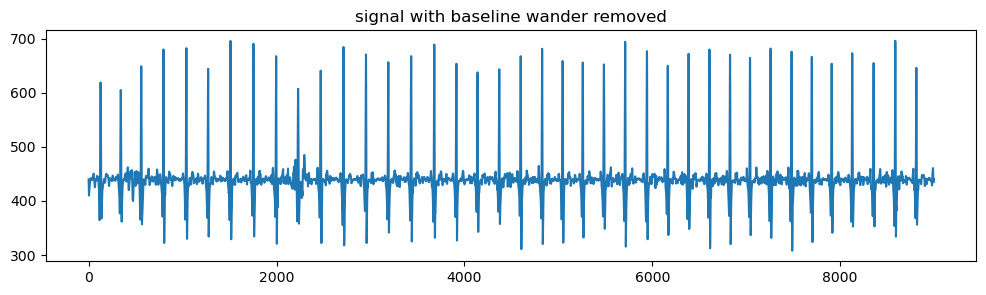

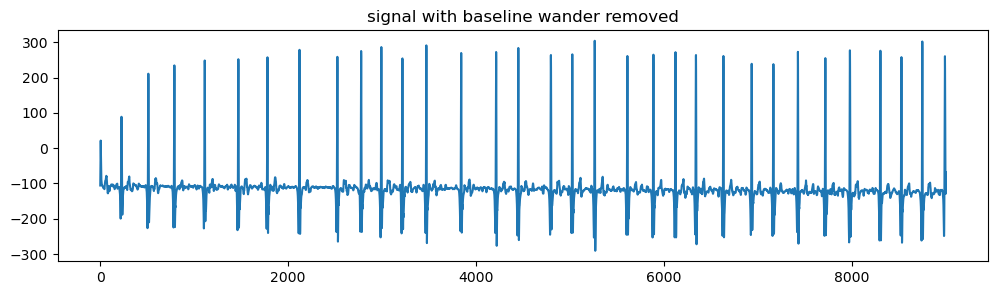

In [63]:
m0=ecg['ECG'].iloc[0].split(',')
M0=[float(j) for j in m0]
m1=ecg['ECG'].iloc[2].split(',')
print(ecg['Classification'][250])
M1=[float(j) for j in m1]
filtered = filter_and_visualise(M0, sample_rate)
filtered = filter_and_visualise(M1, sample_rate)

In [23]:
print(len(l1))
print(len(data_HR))

3484
3484


In [28]:
d=[]
for i in range(len(data_HR)):
    k=[]
    wd,m=hp.process(data_HR[i],sample_rate)
    for i in m.keys():
        k.append(m[i])
    d.append(k)

In [27]:
for i in m.keys():
    print(i)

bpm
ibi
sdnn
sdsd
rmssd
pnn20
pnn50
hr_mad
sd1
sd2
s
sd1/sd2
breathingrate


In [32]:
def feat_list(i):
    lst=[]
    for j in range (len(d)):
        lst.append(d[j][i])
    return lst
bpm=feat_list(0)
ibi=feat_list(1)
sdnn=feat_list(2)
sdsd=feat_list(3)
rmssd=feat_list(4)
pnn20=feat_list(5)
pnn50=feat_list(6)
hr_mad=feat_list(7)
sd1=feat_list(8)
sd2=feat_list(9)
s=feat_list(10)
sd1_sd2=feat_list(11)
breathingrate=feat_list(12)

3484 3484 3484 3484 3484 3484 3484 3484 3484


In [33]:
df=pd.DataFrame({'num':[i for i in range(3484)],'bpm':bpm,'ibi':ibi,'sdnn':sdnn,'sdsd':sdsd,'rmssd':rmssd,'pnn20':pnn20,'pnn50':pnn50,'hr_mad':hr_mad,'sd1':sd1,'sd2':sd2,'s':s,'sd1_sd2':sd1_sd2,'breathingrate':breathingrate,'class':l1})

In [34]:
df.head()

,num,bpm,ibi,sdnn,sdsd,rmssd,pnn20,pnn50,hr_mad,sd1,sd2,s,sd1_sd2,breathingrate,class
0,0,75.665577,792.962963,20.514641,10.921119,20.982797,0.25,0.00,13.333333,14.598207,25.547817,1171.664265,0.571407,0.280308,N
1,1,284.210526,211.111111,51.376125,0.0,40.000000,1.00,0.00,40.000000,0.000000,0.000000,0.000000,NaN,NaN,N
2,2,64.554692,929.444444,221.939403,188.309438,271.321867,0.80,0.60,83.333333,191.597959,256.415461,154342.297026,0.747217,0.179404,A
3,3,57.507987,1043.333333,8.164966,5.0,15.811388,0.00,0.00,10.000000,10.606602,3.535534,117.809725,3.000000,NaN,N
4,4,61.573546,974.444444,24.770552,19.79057,34.560736,0.50,0.25,11.666667,24.438130,19.790570,1519.414121,1.234837,0.171086,N


In [40]:
df.isnull().sum()

num                0
bpm              187
ibi              187
sdnn             187
sdsd               0
rmssd            312
pnn20            312
pnn50            312
hr_mad           187
sd1              312
sd2              312
s                312
sd1_sd2          370
breathingrate    362
dtype: int64

In [36]:
df1=df.dropna()

In [37]:
df1.shape

(3102, 15)

In [40]:
in1=df1.drop(columns=['class'])
res=df1['class']

In [48]:
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score 
model=dtc()
in1_1,in1_2,res_1,res_2=tts(in1 , res ,test_size=0.2)
model.fit(in1_1 , res_1)
predictions=model.predict(in1_2)
score=accuracy_score(res_2,predictions)
print(score)

0.9388083735909822
